In [114]:
import re
import numpy as np
from scipy.spatial import distance
import operator
import math
from scipy import linalg
from matplotlib import pylab as plt

In [115]:
%matplotlib inline

# Task 1

In [81]:
file_obj=open('sentences.txt', 'r')
data_list=list()
data_list_2=list()

In [82]:
for line in file_obj:
    line=line.lower().strip()
    result=re.split('[^a-z]',line)
    data_list.extend(result)
    data_list_2.append(result)

In [83]:
data_list=list(filter(None, data_list))

In [84]:
data_dict={}
i=0
for word in data_list:
    if word not in data_dict.values():
        data_dict[i]=word
        i+=1
print(data_dict)

{0: 'in', 1: 'comparison', 2: 'to', 3: 'dogs', 4: 'cats', 5: 'have', 6: 'not', 7: 'undergone', 8: 'major', 9: 'changes', 10: 'during', 11: 'the', 12: 'domestication', 13: 'process', 14: 'as', 15: 'cat', 16: 'simply', 17: 'catenates', 18: 'streams', 19: 'of', 20: 'bytes', 21: 'it', 22: 'can', 23: 'be', 24: 'also', 25: 'used', 26: 'concatenate', 27: 'binary', 28: 'files', 29: 'where', 30: 'will', 31: 'just', 32: 'sequence', 33: 'a', 34: 'common', 35: 'interactive', 36: 'use', 37: 'for', 38: 'single', 39: 'file', 40: 'is', 41: 'output', 42: 'content', 43: 'standard', 44: 'hear', 45: 'sounds', 46: 'too', 47: 'faint', 48: 'or', 49: 'high', 50: 'frequency', 51: 'human', 52: 'ears', 53: 'such', 54: 'those', 55: 'made', 56: 'by', 57: 'mice', 58: 'and', 59: 'other', 60: 'small', 61: 'animals', 62: 'one', 63: 'people', 64: 'deliberately', 65: 'tamed', 66: 'artificial', 67: 'selection', 68: 'they', 69: 'were', 70: 'useful', 71: 'predators', 72: 'vermin', 73: 'domesticated', 74: 'its', 75: 'closes

In [86]:
matrix=np.eye(len(data_list_2), len(data_dict))
for i in range(len(data_list_2)):
    for k in data_dict.keys():
        matrix[i][k]=data_list_2[i].count(data_dict[k])

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 1.]])

In [93]:
distances={}
for i in range(1,22):
    distances[i+1]=distance.cosine(matrix[0, :], matrix[i, :])
print(distances)

{2: 0.9527544408738466, 3: 0.8644738145642124, 4: 0.8951715163278082, 5: 0.7770887149698589, 6: 0.9402385695332803, 7: 0.7327387580875756, 8: 0.9258750683338899, 9: 0.8842724875284311, 10: 0.9055088817476932, 11: 0.8328165362273942, 12: 0.8804771390665607, 13: 0.8396432548525454, 14: 0.8703592552895671, 15: 0.8740118423302576, 16: 0.9442721787424647, 17: 0.8406361854220809, 18: 0.956644501523794, 19: 0.9442721787424647, 20: 0.8885443574849294, 21: 0.8427572744917122, 22: 0.8250364469440588}


In [95]:
sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
print(sorted_d)

[(7, 0.7327387580875756), (5, 0.7770887149698589), (22, 0.8250364469440588), (11, 0.8328165362273942), (13, 0.8396432548525454), (17, 0.8406361854220809), (21, 0.8427572744917122), (3, 0.8644738145642124), (14, 0.8703592552895671), (15, 0.8740118423302576), (12, 0.8804771390665607), (9, 0.8842724875284311), (20, 0.8885443574849294), (4, 0.8951715163278082), (10, 0.9055088817476932), (8, 0.9258750683338899), (6, 0.9402385695332803), (16, 0.9442721787424647), (19, 0.9442721787424647), (2, 0.9527544408738466), (18, 0.956644501523794)]


# Task 2

In [125]:
def f(x):
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5 * math.exp(-x / 2.0)

## Polinom 1

In [126]:
#A*w=b
A=np.array([[1, 1], [1, 15]])
b=np.array([[f(1)], [f(15)]])
w=linalg.solve(A, b)

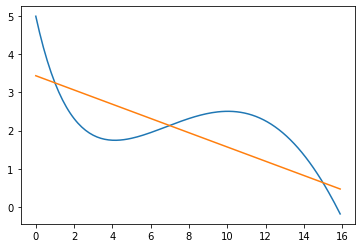

In [137]:
x=np.arange(0, 16, 0.1)
f2 = np.vectorize(f)
polinom_1=w[0]+w[1]*x
plt.plot(x, f2(x), x, polinom_1, '-')
plt.show()

## Polinom 2

In [138]:
A=np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
b=np.array([[f(1)], [f(8)], [f(15)]])
w=linalg.solve(A, b)

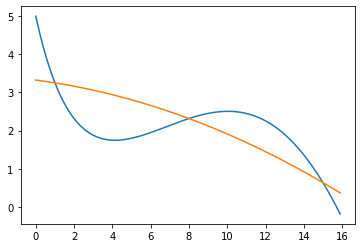

In [139]:
x=np.arange(0, 16, 0.1)
f2 = np.vectorize(f)
polinom_1=w[0]+w[1]*x+w[2]*(x**2)
plt.plot(x, f2(x), x, polinom_1, '-')
plt.show()

## Polinom 3

In [142]:
A=np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]])
b=np.array([[f(1)], [f(4)], [f(10)], [f(15)]])
w=linalg.solve(A, b)
print (w)

[[ 4.36264154]
 [-1.29552587]
 [ 0.19333685]
 [-0.00823565]]


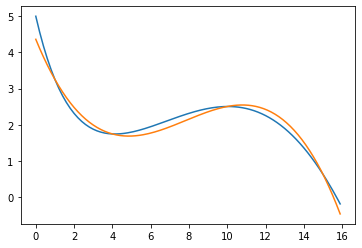

In [141]:
x=np.arange(0, 16, 0.1)
f2 = np.vectorize(f)
polinom_1=w[0]+w[1]*x+w[2]*(x**2)+w[3]*(x**3)
plt.plot(x, f2(x), x, polinom_1, '-')
plt.show()